In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from zoneinfo import ZoneInfo
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 14}) # Set global font size to 18
plt.rcParams["figure.figsize"] = (10, 6) 

# left_motor = pd.read_csv(f'../data/dados_telemetria/vespasiano_190126/teste-vesp1/85_LEFT_MOTOR_TRACTIVE.csv')
# wheel_speed = pd.read_csv(f'../data/dados_telemetria/vespasiano_190126/teste-vesp1/79_WHEEL_SPEED.csv')
# full_df = pd.read_csv(f'../data/dados_telemetria/vespasiano_190126/teste-vesp1/76_DRIVER_INPUTS.csv')
full_df = pd.read_csv(f'../data/dados_telemetria/vespasiano_190126/full/FULL_76_DRIVER_INPUTS.csv')

In [7]:
def get_range_by_time(timestamps, start_date, end_date):
    if end_date == -1 or start_date == -1:
        return range(len(timestamps))
    
    start_timestamp = start_date.timestamp() * 1000
    end_timestamp = end_date.timestamp() * 1000

    start_idx = -1
    for index, value in enumerate(timestamps):
        if value > start_timestamp:
            start_idx = index
            break

    if start_idx == -1: start_idx = 0

    end_idx = -1
    for index, value in enumerate(timestamps):
        if value > end_timestamp:
            end_idx = index
            break

    if end_idx == -1: end_idx = len(timestamps) - 1

    return range(start_idx, end_idx)

START_DATE = datetime(2026, 1, 19, 11, 18, 00, tzinfo=ZoneInfo("America/Sao_Paulo"))
END_DATE = datetime(2026, 1, 19, 11, 21, 15, tzinfo=ZoneInfo("America/Sao_Paulo"))
# END_DATE = -1

range_plot = get_range_by_time(full_df['date'], START_DATE, END_DATE)
timestamps_plot = full_df['date'][range_plot] / 1000

# Convert Unix timestamps to datetime objects
dates_plot = [datetime.fromtimestamp(ts) for ts in timestamps_plot]


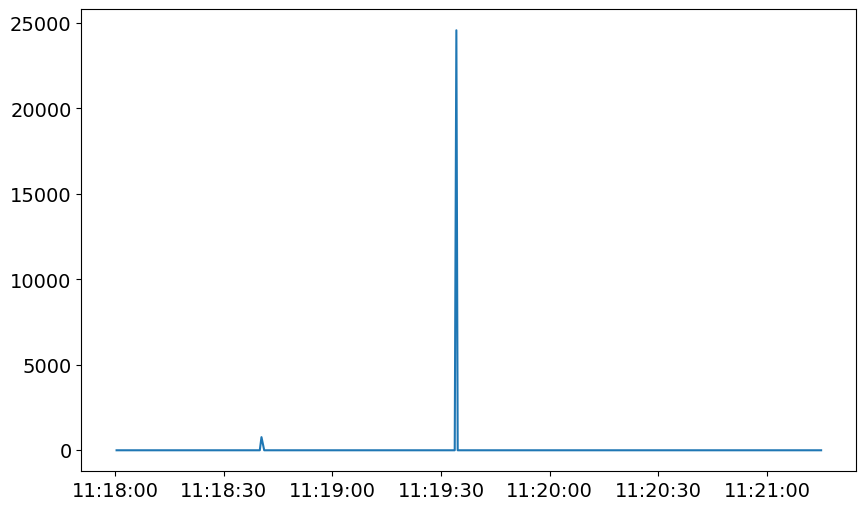

In [8]:
plt.plot(dates_plot, full_df['BRAKE'][range_plot])
# plt.plot(dates_plot, left_motor['CURRENT'][range_plot])
plt.show()

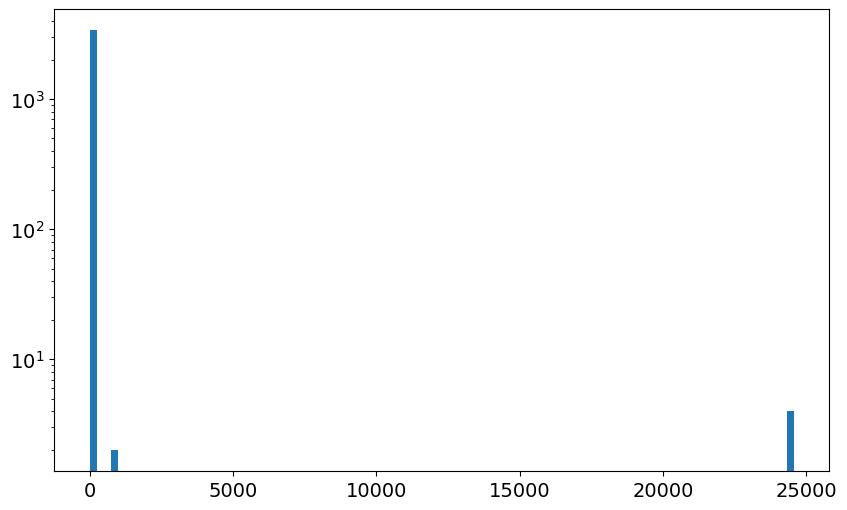

In [10]:
plt.hist(full_df['BRAKE'], bins = 100)
plt.yscale("log")
plt.show()

In [11]:
for i in range(full_df['BRAKE'].shape[0]-1):
    if full_df['BRAKE'][i] > 0: print(full_df['BRAKE'][i])

24576
24576
768
24576
24576
768
